# Визуализация погрешностей

Точный учет погрешностей, как и точная информация о самих значениях важен для любых научных измерений. Например, представьте, что я использую некоторые астрофизические наблюдения для оценки постоянной Хаббла, то есть измеряю скорость расширения Вселенной в данной точке. Мне известно, что в современных источниках по этому вопросу указывается значение около 71 (км/с)/Мпк, а я с помощью моего метода получил значение 74 (км/с)/Мпк. Не противоречат ли значения друг другу? По вышеприведенной информации ответить на этот вопрос невозможно.

Теперь допустим, что я дополнил эту информацию погрешностями: современные источники указывают значение около 71 ± 2,5 (км/с)/Мпк, а мой метод дал значение 74 ± 5 (км/с)/Мпк. Не противоречат ли теперь значения друг другу? Это вопрос, на который вполне можно дать количественный ответ.

При визуализации данных и результатов эффективное отображение погрешностей позволяет передавать с помощью графика намного более полную информацию.

## Простые планки погрешностей

Простые планки погрешностей можно создать с помощью вызова всего одной функции библиотеки Matplotlib

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

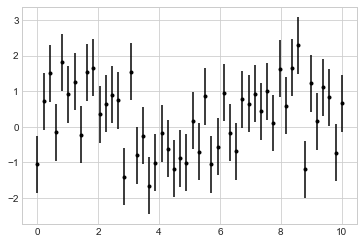

In [3]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy*np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

Здесь fmt — код форматирования, управляющий внешним видом линий и точек, его синтаксис совпадает с сокращенным синтаксисом, используемым в функции plt.plot, описываемой в разделах «Простые линейные графики» и «Простые диаграммы рассеяния» данной главы.

Помимо этих простейших, у функции errorbar есть множество параметров для более тонкой настройки выводимых данных. С помощью этих дополнительных параметров вы можете легко настроить в соответствии со своими требованиями внешний вид графика планок погрешностей. Планки погрешностей удобно делать более светлыми, чем точки, особенно на насыщенных графиках:

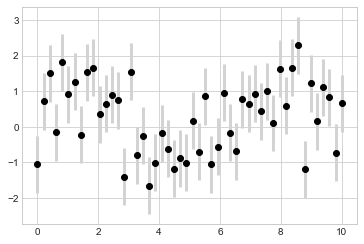

In [4]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0);

В дополнение к этим опциям можно также создавать горизонтальные планки погрешностей (xerr), односторонние планки погрешностей и много других вариантов. Чтобы узнать больше об имеющихся опциях, обратитесь к docstring функции plt.errorbar.

## Непрерывные погрешности

В некоторых случаях желательно отображать планки погрешностей для непрерывных величин. Хотя в библиотеке Matplotlib отсутствует встроенная удобная утилита для решения данной задачи, не составит особого труда скомбинировать такие примитивы, как plt.plot и plt.fill_between, для получения искомого результата.

Выполним с помощью API пакета Scikit-Learn простую регрессию на основе Гауссова процесса (Gaussian process regression, GPR). Она представляет собой метод подбора по имеющимся данным очень гибкой непараметрической функции с непрерывной мерой неопределенности измерения. Мы не будем углубляться в детали регрессии на основе Гауссова процесса, а сконцентрируемся на визуализации подобной непрерывной погрешности измерения:

In [14]:
from sklearn.gaussian_process import GaussianProcess
# Описываем модель и отрисовываем некоторые данные
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)
# Выполняем подгонку Гауссова процесса
gp = GaussianProcess1(corr='cubic', theta0=1e-2, thetaL=1e-4,
thetaU=1E-1, random_start=100)
gp.fit(xdata[:, np.newaxis], ydata)
xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE=True)
dyfit = 2 * np.sqrt(MSE) # 2*сигма ~ область с уровнем доверия 95%


# стр. 285

ImportError: cannot import name 'GaussianProcess' from 'sklearn.gaussian_process' (c:\users\rusancovs\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\gaussian_process\__init__.py)

"""Библиотека не подгужается, решения пока не нашел"""